In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import glob, os
import csv
import datetime
from geopy import distance
import numpy as np
import time
import gmaps
import gmaps.datasets
from googlemaps import Client as GoogleMaps
import requests
import calendar
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

In [2]:
Bike_2019_clean = pd.read_csv("../Group-Project_team3/Resources/Bike_2019_clean.csv", index_col=[0])
Bike_2020_clean = pd.read_csv("../Group-Project_team3/Resources/Bike_2020_clean.csv", index_col=[0])


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
Bike_2019_clean.sample(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,start_lat,start_lng,end_lat,end_lng,day_of_week,Distance Traveled,year,Month,Hour,Id
197154,2396,2019-06-03 15:05:00,2019-06-03 15:45:00,31288,4th St & Madison Dr NW,31257,22nd & I St NW / Foggy Bottom,W00534,Casual,38.869292,-77.132996,38.921900,-77.229811,Monday,10.22,2019,Jun,15,31288-31257
745676,183,2019-05-14 18:10:00,2019-05-14 18:13:00,31038,Glebe Rd & 11th St N,31037,Ballston Metro / Stuart St & 9th St N,W23057,Member,38.897538,-77.123496,38.881963,-77.111424,Tuesday,2.02,2019,May,18,31038-31037
818985,595,2019-05-03 06:35:00,2019-05-03 06:45:00,32215,Wiehle Ave & Reston Station Blvd,32217,Sunset Hills Rd & Discovery Square,W23391,Member,38.969108,-77.333482,38.951833,-77.342306,Friday,2.07,2019,May,6,32215-32217
382726,282,2019-05-31 13:11:00,2019-05-31 13:16:00,31242,18th St & Pennsylvania Ave NW,31291,Vermont Ave & I St NW,W20308,Member,38.903177,-77.041377,38.916035,-77.149074,Friday,9.43,2019,May,13,31242-31291
145237,1058,2019-06-20 16:56:00,2019-06-20 17:14:00,31261,21st St & Constitution Ave NW,31614,11th & H St NE,W01265,Member,38.905281,-77.046684,38.808228,-77.263504,Thursday,21.65,2019,Jun,16,31261-31614


In [4]:
Bike_2020_clean.sample(5)

,Id,rideable_type,Start date,End date,Start station,start_station_id,End station,end_station_id,start_lat,start_lng,end_lat,end_lng,Distance Traveled,Member type,is_equity,day_of_week,year,Duration,Month,Hour
58632,5F640C34863535E4,docked_bike,2020-04-12 13:53:00,2020-04-12 13:58:00,15th & P St NW,25.0,14th & V St NW,14.0,38.909900,-77.034400,38.917900,-77.032100,0.911545,member,NaN,Sunday,2020,300,Apr,6
252836,861772DED16951EB,docked_bike,2020-06-23 19:41:00,2020-06-23 19:49:00,7th & K St NW,586.0,14th & Rhode Island Ave NW,27.0,38.902674,-77.021392,38.908600,-77.032300,1.151125,member,NaN,Tuesday,2020,480,Jun,13
112375,D6F94BA8A834D91C,docked_bike,2020-05-25 16:42:00,2020-05-25 16:56:00,17th St & Massachusetts Ave NW,291.0,3rd & Elm St NW,80.0,38.908100,-77.038400,38.917600,-77.016000,2.207260,member,False,Monday,2020,840,May,15
34858,230B823380147B5B,docked_bike,2020-04-19 18:07:00,2020-04-19 18:32:00,6th & K St NE,501.0,John McCormack Dr & Michigan Ave NE,57.0,38.902900,-76.998400,38.934600,-76.995500,3.533797,casual,NaN,Sunday,2020,1500,Apr,16
317046,9A457E403EE742D9,docked_bike,2020-06-30 11:57:00,2020-06-30 12:14:00,18th St & Wyoming Ave NW,76.0,15th & W St NW,496.0,38.918809,-77.041571,38.919086,-77.034502,0.612340,casual,NaN,Tuesday,2020,1020,Jun,16


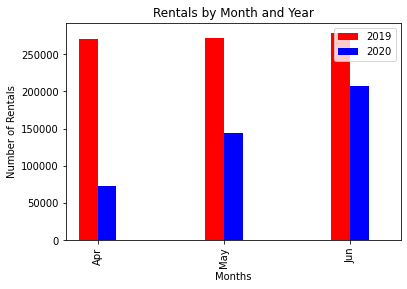

Comparison of bike rentals during peak Covid-19, 2nd Quarter of 2020 compared to same period in 2019


In [5]:
colors = ['#034694','#001C58','#5CBFEB']
bar_width = .15
b_2019 = Bike_2019_clean["Month"].value_counts().sort_values(ascending= True)
b_2020 =Bike_2020_clean['Month'].value_counts().sort_values(ascending=True)
#b_2019.plot(kind = 'bar', title ="Rentals by Month",fontsize=12, color = colors, position=1)
b_2019.plot(kind='bar', color='red', width=bar_width, position =1)
b_2020.plot(kind='bar', color='blue', width=bar_width, position=0)

plt.xlabel("Months")
plt.ylabel("Number of Rentals")
plt.title("Rentals by Month and Year")
plt.legend(["2019", "2020"])
plt.savefig('images/ridesPer_month.png', dpi=300, bbox_inches='tight')
plt.show()
print ("Comparison of bike rentals during peak Covid-19, 2nd Quarter of 2020 compared to same period in 2019")

In [6]:
member = Bike_2020_clean.groupby('Member type').agg('count')
member_2019 = Bike_2019_clean.groupby("Member type").agg("count")


During the second quarter of 2020 (Covid-19) bike rentals were evenly split between casual renters (210902) and members(213794)
During the second quarter of 2019 (pre-Covid-19) bikes were primarily rented(85%) by members (106312) and casual renters(714524)


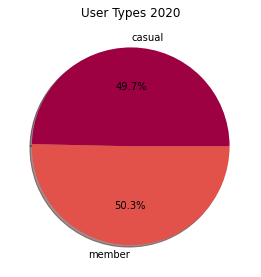

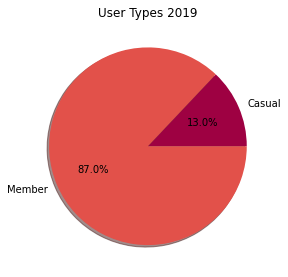

In [7]:
type_labels = member.Duration.sort_values().index 
type_counts = member.Duration.sort_values()
type_counts2 = member_2019.Duration.sort_values()
type_labels2 = member_2019.Duration.sort_values().index
print(f'During the second quarter of 2020 (Covid-19) bike rentals were evenly split between casual renters\
 ({[type_counts][0][0]}) and\
 members({[type_counts][0][1]})')
print(f'During the second quarter of 2019 (pre-Covid-19) bikes were primarily rented(85%) by members\
 ({[type_counts2][0][0]}) and\
 casual renters({[type_counts2][0][1]})')
#print(f'({type_counts}')
plt.figure(0, figsize=(20,10)) 
the_grid = GridSpec(2,2,)
cmap = plt.get_cmap('Spectral')
color1=['#034694','#001C58']
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='User Types 2020')
type_members = plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2,2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='User Types 2019')
type_members2 = plt.pie(type_counts2, labels = type_labels2,autopct='%1.1f%%', shadow=True, colors=colors)
plt.savefig('images/User_types19_20.png', dpi=300, bbox_inches='tight')
plt.show()

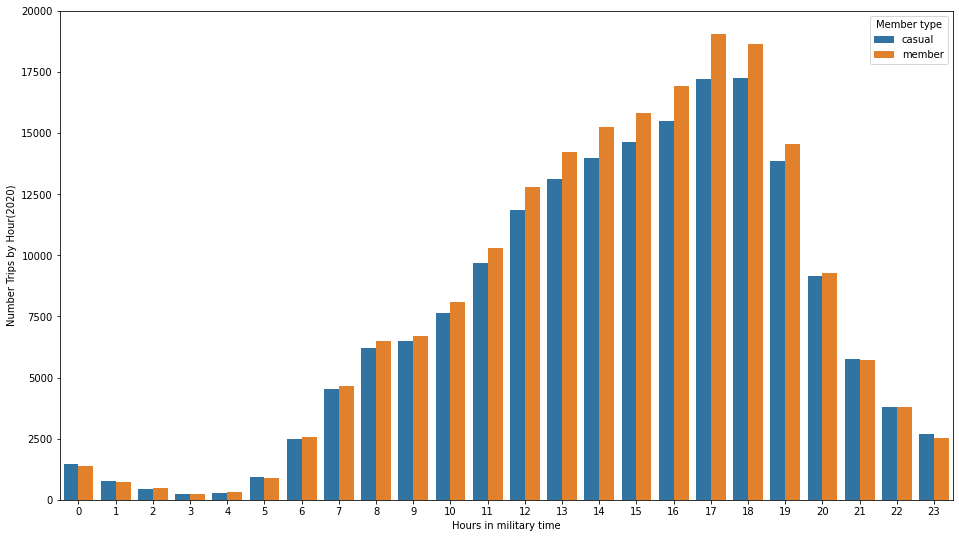

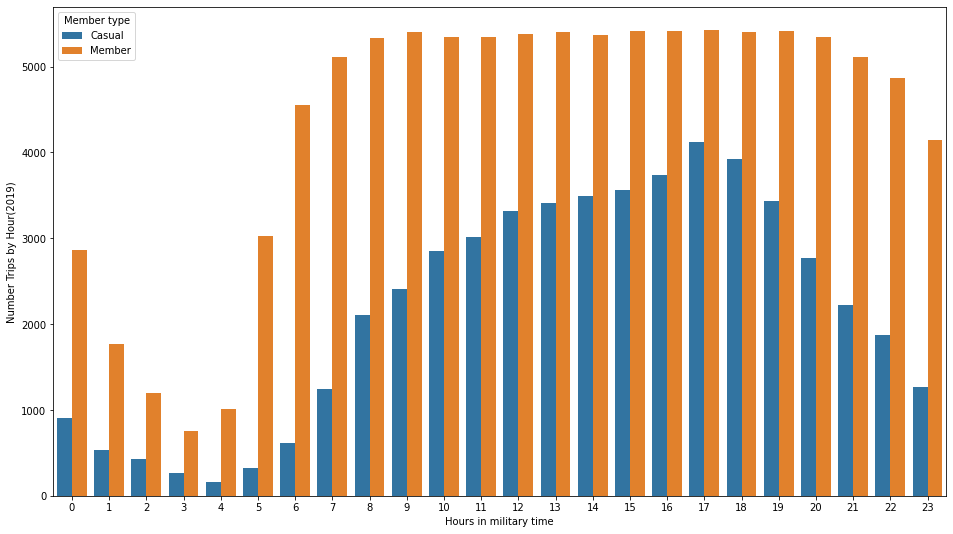

In [8]:
hour_use =Bike_2020_clean.groupby(['Start date', "Hour", "Member type"])['Id'].nunique().groupby(['Hour', 'Member type']).count().reset_index()
fig, ax = plt.subplots(figsize=(16,9))
sns.barplot(x='Hour', y='Id', hue='Member type', data=hour_use, ax=ax)
ax.set_ylabel("Number Trips by Hour(2020)")
ax.set_xlabel("Hours in military time")
plt.savefig('images/tripsByHour2020.png', dpi=300, bbox_inches='tight')
hour_use19 =Bike_2019_clean.groupby(['Start date', "Hour", "Member type"])['Id'].nunique().groupby(['Hour', 'Member type']).count().reset_index()
fig, ax = plt.subplots(figsize=(16,9))
sns.barplot(x='Hour', y='Id', hue='Member type', data=hour_use19, ax=ax)
ax.set_ylabel("Number Trips by Hour(2019)")
ax.set_xlabel("Hours in military time")
plt.savefig('images/tripsByHour2019.png', dpi=300, bbox_inches='tight')

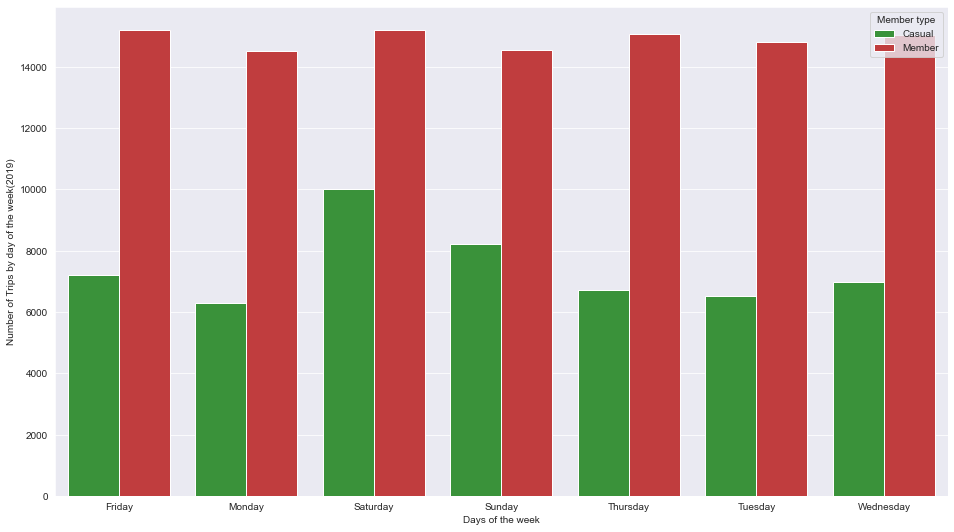

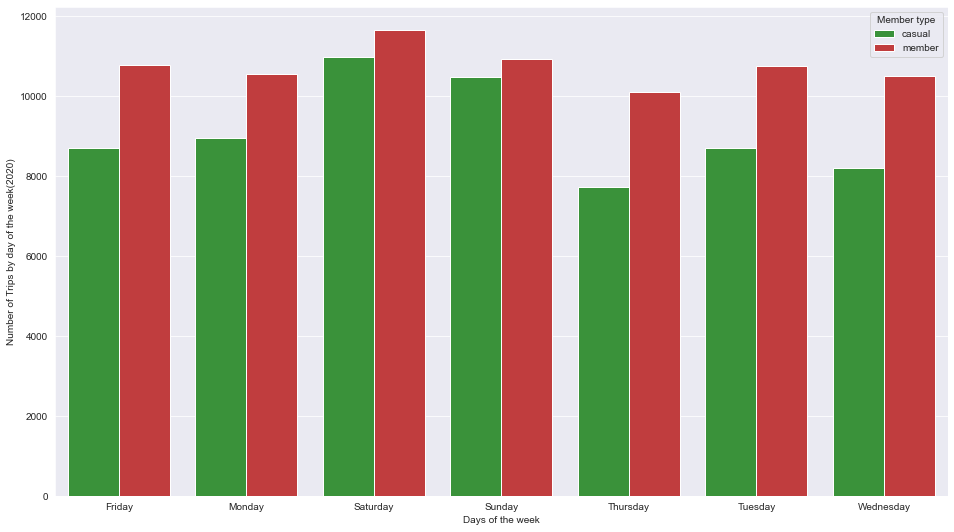

In [9]:
sns.set_style('darkgrid')
unique = hour_use19["Member type"].append(hour_use["Member type"]).unique()
unique1 = hour_use["Member type"].append(hour_use19["Member type"]).unique()
palette = dict(zip(unique, sns.color_palette()))
palette1 = dict(zip(unique1, sns.color_palette()))
palette.update({"Total":"k"})
hour_use19 =Bike_2019_clean.groupby(['Start date', "day_of_week", "Member type"])['Id'].nunique().groupby(['day_of_week', 'Member type']).count().reset_index()
fig, ax = plt.subplots(figsize=(16,9))
sns.barplot(x='day_of_week', y='Id', hue='Member type', data=hour_use19, ax=ax,ci=None, palette=palette1)
ax.set_ylabel("Number of Trips by day of the week(2019)")
ax.set_xlabel("Days of the week")
plt.savefig('images/tripsByDay2019.png', dpi=300, bbox_inches='tight')
hour_use =Bike_2020_clean.groupby(['Start date', "day_of_week", "Member type"])['Id'].nunique().groupby(['day_of_week', 'Member type']).count().reset_index()
fig, ax = plt.subplots(figsize=(16,9))
sns.barplot(x='day_of_week', y='Id', hue='Member type', data=hour_use, ax=ax, ci=None, palette=palette)
ax.set_ylabel("Number of Trips by day of the week(2020)")
ax.set_xlabel("Days of the week")
plt.savefig('images/tripsByDay2020.png', dpi=300, bbox_inches='tight')

In [10]:
temp_df = Bike_2019_clean[["day_of_week", "Hour"]]
Sunday = temp_df[temp_df.day_of_week == "Sunday"]
Monday = temp_df[temp_df.day_of_week == "Monday"]
Tuesday = temp_df[temp_df.day_of_week == "Tuesday"]
Wednesday = temp_df[temp_df.day_of_week == "Wednesday"]
Thursday = temp_df[temp_df.day_of_week == "Thursday"]
Friday = temp_df[temp_df.day_of_week == "Friday"]
Saturday = temp_df[temp_df.day_of_week == "Saturday"]

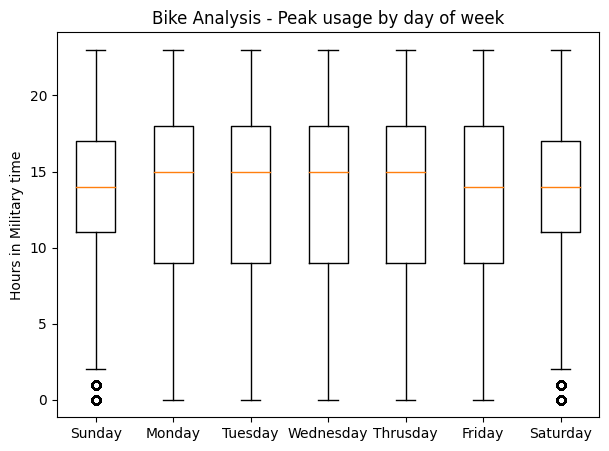

In [11]:
# Hina Graph Box Plot 


# Create and format Box Plot 

plt.style.use('default')

plt.figure(figsize=(7,5))

labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thrusday", "Friday", "Saturday"]
          

plt.boxplot([Sunday.Hour, Monday.Hour, Tuesday.Hour, Wednesday.Hour, Thursday.Hour, Friday.Hour, Saturday.Hour], labels=labels)

plt.title ("Bike Analysis - Peak usage by day of week")
plt.ylabel ("Hours in Military time")
plt.savefig('images/peak_Usage_dayofweek.png', dpi=300, bbox_inches='tight')
plt.show()